In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
import urllib.request as url
import json

In [ ]:
path = "https://data.covid19india.org/states_daily.json"
response = url.urlopen(path)

In [ ]:
data = json.load(response)

In [ ]:
states = data['states_daily']

In [ ]:
df = pd.DataFrame(states)

In [ ]:
df.shape

(1563, 42)

In [ ]:
df.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dateymd', 'dd', 'dl',
       'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh',
       'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status',
       'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')

In [ ]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
df.dtypes

an         object
ap         object
ar         object
as         object
br         object
ch         object
ct         object
date       object
dateymd    object
dd         object
dl         object
dn         object
ga         object
gj         object
hp         object
hr         object
jh         object
jk         object
ka         object
kl         object
la         object
ld         object
mh         object
ml         object
mn         object
mp         object
mz         object
nl         object
or         object
pb         object
py         object
rj         object
sk         object
status     object
tg         object
tn         object
tr         object
tt         object
un         object
up         object
ut         object
wb         object
dtype: object

In [ ]:
df['dl'][0]

'7'

In [ ]:
df['dateymd'][0]

'2020-03-14'

In [ ]:
df['dateymd'] = pd.to_datetime(df['dateymd'])

In [ ]:
df['dateymd'][0]

Timestamp('2020-03-14 00:00:00')

In [ ]:
df['dl'] = df['dl'].astype('int')
df['up'] = df['up'].astype('int')
df['tn'] = df['tn'].astype('int')
df['rj'] = df['rj'].astype('int')
df['mh'] = df['mh'].astype('int')
df['tt'] = df['tt'].astype('int')

In [ ]:
df['dl'][0]

7

In [ ]:
pd.value_counts(df['status'])

Recovered    521
Confirmed    521
Deceased     521
Name: status, dtype: int64

In [ ]:
df['dl'].sum()

2873769

In [ ]:
confirmed_df = df[df['status'] == 'Confirmed']
recovered_df = df[df['status'] == 'Recovered']
deceased_df = df[df['status'] == 'Deceased']

In [ ]:
confirmed_df.shape

(521, 42)

In [ ]:
confirmed_df['dl'].sum()

1437118

In [ ]:
deceased_df['dl'].sum()

25069

In [ ]:
recovered_df['dl'].sum()

1411582

In [ ]:
confirmed_df['tt'].sum()

32249044

In [ ]:
confirmed_df['tt'].mean()

61898.35700575816

In [ ]:
confirmed_df['tt'].max()

414280

In [ ]:
confirmed_df['tt'].min()

11

In [ ]:
maxIndex = confirmed_df['tt'].argmax()

In [ ]:
confirmed_df.iloc[maxIndex]['date']

'06-May-21'

In [ ]:
confirmed_df.sort_values(by='tt', ascending=False).head(10)[['dl','mh','rj','tt']].reset_index(drop=True)

,dl,mh,rj,tt
0,19133,62194,17532,414280
1,20960,57640,16815,412624
2,19832,54022,18231,406901
3,17364,56578,17987,403808
4,27047,62919,17155,402014
5,25219,63282,17652,392576
6,24235,66159,17269,386773
7,19953,51880,16974,382847
8,25986,63309,16613,379404
9,20394,56647,18298,370090


In [ ]:
df.groupby('status')['tt'].sum()

status
Confirmed    32249044
Deceased       432117
Recovered    31441098
Name: tt, dtype: int64

In [ ]:
df.groupby('status')['dl'].sum()

status
Confirmed    1437118
Deceased       25069
Recovered    1411582
Name: dl, dtype: int64

In [ ]:
# df.groupby('status')['dl'].count()
df.groupby('status')['dl'].mean()

status
Confirmed    2758.383877
Deceased       48.117083
Recovered    2709.370441
Name: dl, dtype: float64

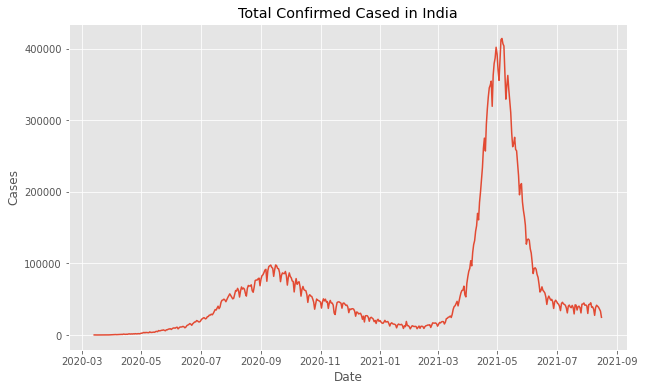

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['tt'])
plt.title("Total Confirmed Cased in India")
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

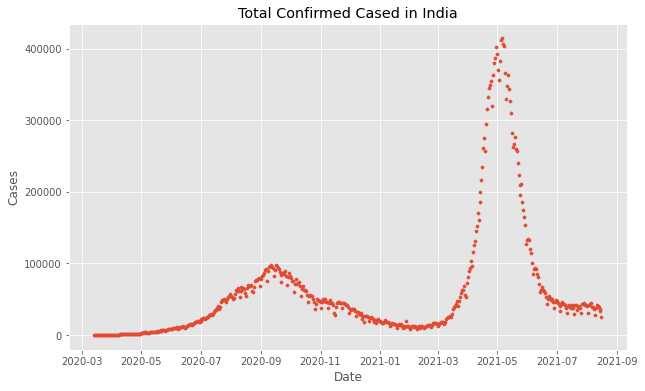

In [ ]:
plt.figure(figsize = (10,6))
# plt.plot(confirmed_df['dateymd'], confirmed_df['tt'], 'o')
plt.scatter(confirmed_df['dateymd'], confirmed_df['tt'], marker='o', s=10)
plt.title("Total Confirmed Cased in India")
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

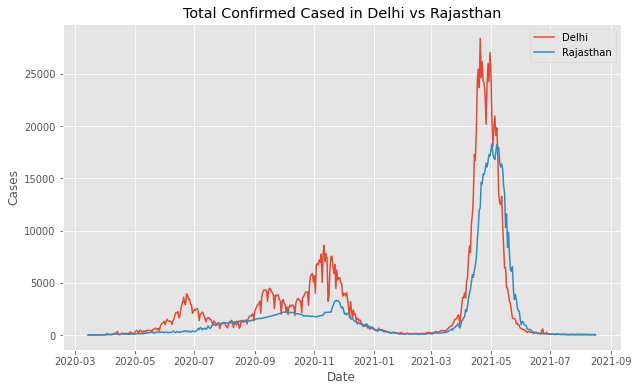

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['dl'], label='Delhi')
plt.plot(confirmed_df['dateymd'], confirmed_df['rj'], label='Rajasthan')
plt.title("Total Confirmed Cased in Delhi vs Rajasthan")
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [ ]:
top_10 = confirmed_df.sort_values(by='tt', ascending=False).head(10)[['dl','mh','rj','tt']].reset_index(drop=True)

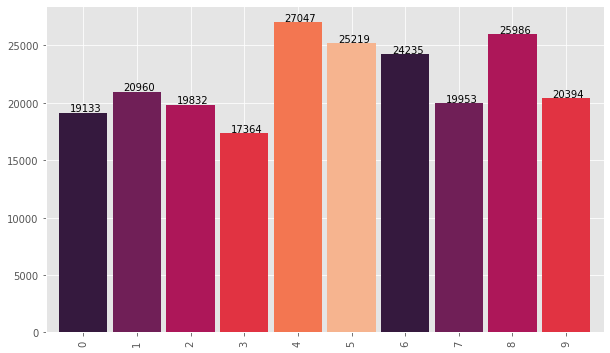

In [ ]:
plt.figure(figsize = (10,6))
axes = top_10['dl'].plot.bar(width=0.9, color=sns.color_palette('rocket'))
for ax in axes.patches:
  axes.annotate(format(ax.get_height()),(ax.get_x() + 0.2, ax.get_height() + 100))
plt.show()

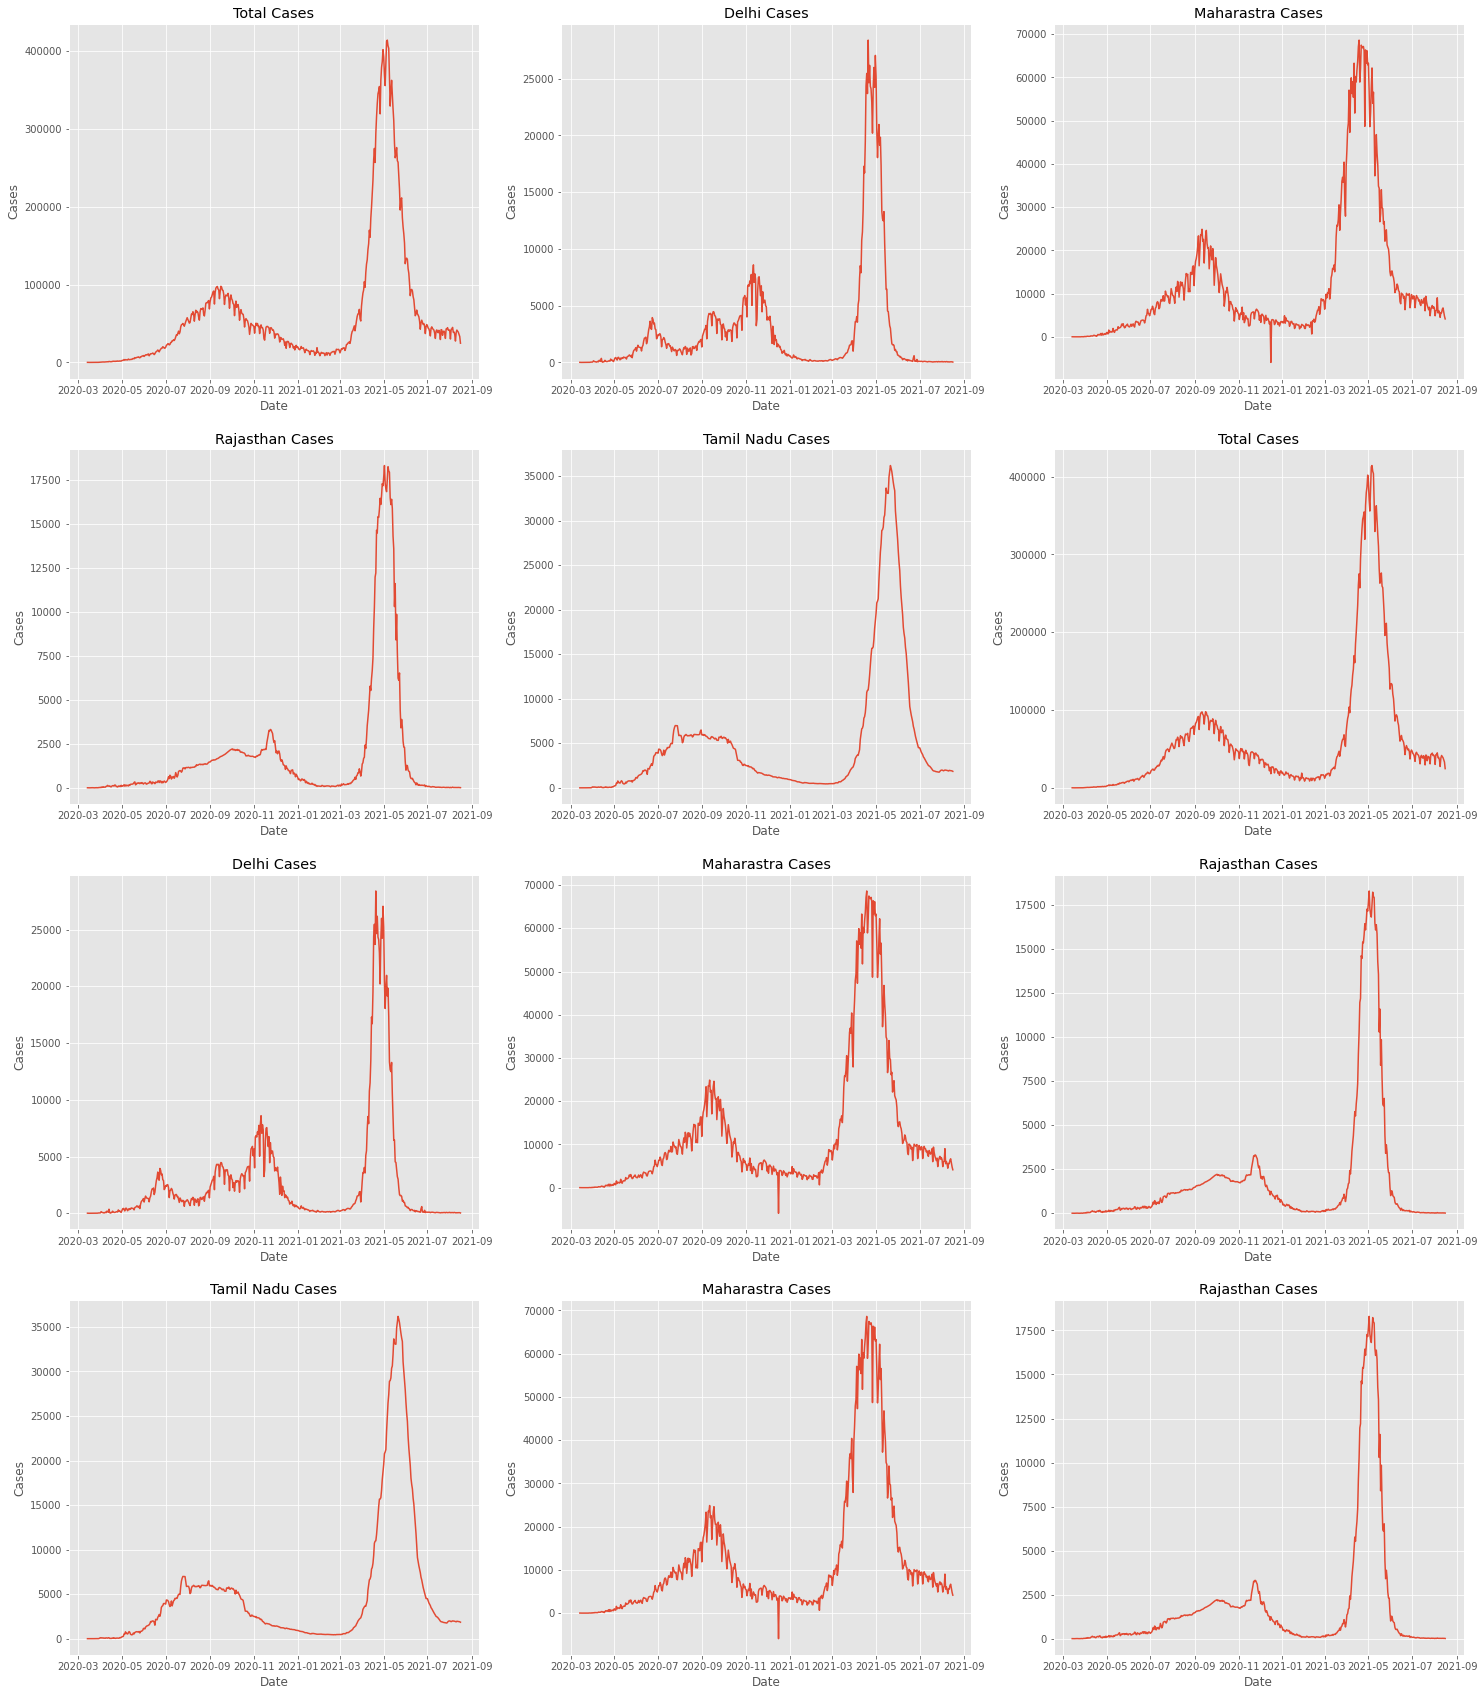

In [ ]:
states = ['tt','dl','mh','rj','tn','tt','dl','mh','rj','tn','mh','rj']
labels = ["Total","Delhi","Maharastra","Rajasthan","Tamil Nadu",
          "Total","Delhi","Maharastra","Rajasthan","Tamil Nadu",
          "Maharastra","Rajasthan",]

plt.figure(figsize=(25,30))

for i in range(12):
  plt.subplot(4,3,i+1)
  plt.plot(confirmed_df['dateymd'], confirmed_df[states[i]])
  plt.title("{} Cases".format(labels[i]))
  plt.xlabel('Date')
  plt.ylabel('Cases')
plt.show()